In [302]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [303]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    ! ls
except: ModuleNotFoundError

In [304]:
file_name = 'df_final.csv'
drive_path = '/content/drive/My Drive/1-Master/Projekte und Ideen/fussball/scraper/df_final.csv'

try:
    df_org = pd.read_csv(drive_path, sep=',', index_col=0)
except:
    df_org = pd.read_csv(file_name, sep=',', index_col=0)

In [305]:
df = df_org.copy()

In [306]:
df.weekday = df.weekday.astype(str)
df.day = df.day.astype(str)
df.month = df.month.astype(str)
df.year = df.year.astype(str)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5158 entries, 0 to 5157
Data columns (total 68 columns):
weekday                         5158 non-null object
day                             5158 non-null object
month                           5158 non-null object
year                            5158 non-null object
home_team_break                 5158 non-null object
guest_team_break                5158 non-null object
date                            5158 non-null object
time                            5158 non-null object
home_team_name                  5158 non-null object
guest_team_name                 5158 non-null object
competition                     5158 non-null object
saison                          5158 non-null object
gameday                         5158 non-null object
home_coach                      5158 non-null object
guest_coach                     5158 non-null object
resultNumeric                   5152 non-null float64
homeTotalGoalsShoot             5158 non-nul

In [308]:
df.columns

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'date', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach',
       'resultNumeric', 'homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       'homeTeamGoalsShootAway', 'homeTeamGoalsReceivedAway',
       'homeTeamGoalsDiffAway', 'guestTeamGoalsShootAtHome',
       'guestTeamGoalsReceivedAtHome', 'guestTeamGoalsDiffAtHome',
       'guestTeamGoalsShootAway', 'guestTeamGoalsReceivedAway',
       'guestTeamGoalsDiffAway', 'hoamAvgPoints', 'guestAvgpoints', 'htb_0',
       'htb_2', 'htb_3', 'htb_4', 'htb_5', 'htb_6', 'htb_7', 'htb_8', 'htb_9',
       'htb_10', 'htb_11', 'htb_12', 'htb_13', 'htb_14', 'htb_15', 'htb_>15',
       'gtb_0', 'gtb_2', 

In [312]:
df.competition.value_counts()

2. Liga                                1945
Bundesliga                             1872
ÖFB-Cup                                 602
Europa League                           166
Europa League Qualifikation             126
Regionalliga West                       120
Regionalliga Mitte                      120
Regionalliga Ost                        120
UEFA Champions League-Qualifikation      54
Relegation Erste Liga                    16
UEFA Champions League                     6
Relegation Bundesliga                     4
Bundesliga Europa League-Play-off         3
Championship                              2
EFL Cup                                   1
DFB-Pokal                                 1
Name: competition, dtype: int64

In [260]:
df = df[df.home_coach != '?']
df = df[df.guest_coach != '?']

In [262]:
df = df.reset_index(drop=True)
df.head(15)

,weekday,day,month,year,home_team_break,guest_team_break,date,time,home_team_name,guest_team_name,...,gtb_7,gtb_8,gtb_9,gtb_10,gtb_11,gtb_12,gtb_13,gtb_14,gtb_15,gtb_>15
0,1,14,7,2009,0,0,2009-07-14,19:00,FC Gratkorn,First Vienna FC,...,0,0,0,0,0,0,0,0,0,0
1,1,14,7,2009,higher15,higher15,2009-07-14,19:00,FC Wacker Innsbruck,Red Bull Juniors Salzburg,...,0,0,0,0,0,0,0,0,0,1
2,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Rheindorf Altach,TSV Hartberg,...,0,0,0,0,0,0,0,0,0,1
3,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SKN St. Pölten,FC Dornbirn,...,0,0,0,0,0,0,0,0,0,1
4,1,14,7,2009,higher15,higher15,2009-07-14,19:00,SC Austria Lustenau,FK Austria Wien Amateure,...,0,0,0,0,0,0,0,0,0,1
5,1,14,7,2009,higher15,higher15,2009-07-14,19:00,FC Admira Wacker Mödling,FC Lustenau,...,0,0,0,0,0,0,0,0,0,1
6,4,17,7,2009,3,3,2009-07-17,18:00,FC Lustenau,FK Austria Wien Amateure,...,0,0,0,0,0,0,0,0,0,0
7,4,17,7,2009,3,3,2009-07-17,18:00,TSV Hartberg,FC Wacker Innsbruck,...,0,0,0,0,0,0,0,0,0,0
8,4,17,7,2009,3,3,2009-07-17,18:00,FC Dornbirn,FC Admira Wacker Mödling,...,0,0,0,0,0,0,0,0,0,0
9,4,17,7,2009,3,3,2009-07-17,18:00,SKN St. Pölten,First Vienna FC,...,0,0,0,0,0,0,0,0,0,0


In [263]:
df.homeTotalGoalsShoot.tail()

3838    1.334507
3839    1.346330
3840    1.612500
3841    1.543046
3842    1.774262
Name: homeTotalGoalsShoot, dtype: float64

In [264]:
df.homeTotalGoalsShoot.tail()

3838    1.334507
3839    1.346330
3840    1.612500
3841    1.543046
3842    1.774262
Name: homeTotalGoalsShoot, dtype: float64

In [265]:
weight_cols = ['homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       'homeTeamGoalsShootAway', 'homeTeamGoalsReceivedAway',
       'homeTeamGoalsDiffAway', 'guestTeamGoalsShootAtHome',
       'guestTeamGoalsReceivedAtHome', 'guestTeamGoalsDiffAtHome',
       'guestTeamGoalsShootAway', 'guestTeamGoalsReceivedAway',
       'guestTeamGoalsDiffAway', 'hoamAvgPoints', 'guestAvgpoints']

In [266]:
df_weights = pd.DataFrame()
weights = [0.1, 0.3, 0.5, 0.7, 0.9]

for weight_index in weights:
    weight = weight_index

    for col in weight_cols:

        b = np.multiply(
        np.divide(
            df[col].groupby(df.home_team_name).cumsum(),
            df[col].groupby(df.home_team_name).cumcount()), weight).replace([np.inf, -np.inf], np.nan).fillna(0)

        col_name = col + '_' + str(int(weight*100))
        df_weights[col_name] = np.multiply(df[col], 1-weight) + b

df_weights.tail()

,homeTotalGoalsShoot_10,homeTotalGoalsReceived_10,homeTotalGoalDiff_10,guestTotalGoalsShoot_10,guestTotalGoalsReceived_10,guestTotalGoalDiff_10,homeTeamGoalsShootAtHome_10,homeTeamGoalsReceivedAtHome_10,homeTeamGoalsDiffAtHome_10,homeTeamGoalsShootAway_10,...,homeTeamGoalsReceivedAway_90,homeTeamGoalsDiffAway_90,guestTeamGoalsShootAtHome_90,guestTeamGoalsReceivedAtHome_90,guestTeamGoalsDiffAtHome_90,guestTeamGoalsShootAway_90,guestTeamGoalsReceivedAway_90,guestTeamGoalsDiffAway_90,hoamAvgPoints_90,guestAvgpoints_90
3838,1.358399,0.607669,0.751744,1.362798,1.514116,-0.151318,1.377773,1.264855,0.118014,1.332803,...,1.610978,-0.000624,1.741992,1.192566,0.573454,1.520531,1.416144,0.125557,1.400615,1.579403
3839,1.358108,0.656813,0.705070,2.187091,0.950704,1.236387,1.401505,1.383574,0.020670,1.316602,...,1.538151,-0.115004,1.794269,1.212690,0.605827,1.551258,1.462847,0.109413,1.459654,1.563935
3840,1.629536,0.495508,1.133195,1.355461,1.688915,-0.333454,1.807515,1.040877,0.763048,1.467961,...,1.280491,0.260271,1.639806,1.286782,0.348164,1.475620,1.531021,-0.058289,1.751877,1.456087
3841,1.543450,0.550958,0.993126,1.763481,1.185429,0.578052,1.624130,1.156313,0.468855,1.469891,...,1.181095,0.294824,1.762338,1.142800,0.611138,1.532076,1.463666,0.063249,1.625754,1.570580
3842,1.776147,0.569989,1.205264,1.526818,1.500811,0.026007,1.769869,1.201613,0.566596,1.781028,...,1.295040,0.447743,1.753347,1.175553,0.565014,1.483295,1.479538,-0.001171,1.731924,1.543378


In [267]:
df_weights.head()

,homeTotalGoalsShoot_10,homeTotalGoalsReceived_10,homeTotalGoalDiff_10,guestTotalGoalsShoot_10,guestTotalGoalsReceived_10,guestTotalGoalDiff_10,homeTeamGoalsShootAtHome_10,homeTeamGoalsReceivedAtHome_10,homeTeamGoalsDiffAtHome_10,homeTeamGoalsShootAway_10,...,homeTeamGoalsReceivedAway_90,homeTeamGoalsDiffAway_90,guestTeamGoalsShootAtHome_90,guestTeamGoalsReceivedAtHome_90,guestTeamGoalsDiffAtHome_90,guestTeamGoalsShootAway_90,guestTeamGoalsReceivedAway_90,guestTeamGoalsDiffAway_90,hoamAvgPoints_90,guestAvgpoints_90
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
df = pd.concat([df, df_weights], axis='columns')

In [269]:
ndf = df.shape[0]
df.shape

(3843, 168)

In [270]:
ndf

3843

In [271]:
df = df.drop(['date'], axis=1)

In [272]:
# df = df.select_dtypes(exclude=object)

In [273]:
from keras.utils import to_categorical

In [274]:
categorial_variables

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach'],
      dtype='object')

In [275]:
categorial_variables = df.columns[:14]
# categorial_variables = categorial_variables.drop(['viewers', 'home_game_system', 'guest_game_system'], axis=1)
categorial_variables

Index(['weekday', 'day', 'month', 'year', 'home_team_break',
       'guest_team_break', 'time', 'home_team_name', 'guest_team_name',
       'competition', 'saison', 'gameday', 'home_coach', 'guest_coach'],
      dtype='object')

In [276]:
df_cat = pd.get_dummies(df[categorial_variables])
df = pd.concat([df, df_cat], axis=1)
df = df.drop(categorial_variables, axis=1)
# df = df.drop(['home_team_break', 'guest_team_break'], axis=1)

In [277]:
df.shape

(3843, 746)

In [278]:
df.head()

,resultNumeric,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,...,guest_coach_Walter Kogler,guest_coach_Walter Schachner,guest_coach_Werner Grabherr,guest_coach_Werner Gregoritsch,guest_coach_Werner Ofner,guest_coach_Wilhelm Schuldes,guest_coach_Wilhelm Wahlmüller,guest_coach_Wolfgang Luisser,guest_coach_Zoran Barisic,guest_coach_Óscar García
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Columns: 746 entries, resultNumeric to guest_coach_Óscar García
dtypes: float64(121), int64(32), uint8(593)
memory usage: 6.7 MB


In [280]:
df.columns

Index(['resultNumeric', 'homeTotalGoalsShoot', 'homeTotalGoalsReceived',
       'homeTotalGoalDiff', 'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
       'guestTotalGoalDiff', 'homeTeamGoalsShootAtHome',
       'homeTeamGoalsReceivedAtHome', 'homeTeamGoalsDiffAtHome',
       ...
       'guest_coach_Walter Kogler', 'guest_coach_Walter Schachner',
       'guest_coach_Werner Grabherr', 'guest_coach_Werner Gregoritsch',
       'guest_coach_Werner Ofner', 'guest_coach_Wilhelm Schuldes',
       'guest_coach_Wilhelm Wahlmüller', 'guest_coach_Wolfgang Luisser',
       'guest_coach_Zoran Barisic', 'guest_coach_Óscar García'],
      dtype='object', length=746)

In [281]:
df.resultNumeric.head()

0    0.0
1    1.0
2    4.0
3    2.0
4    1.0
Name: resultNumeric, dtype: float64

In [282]:
df_pred = df[pd.isnull(df).any(axis=1)]
df = df.dropna()
y = df.resultNumeric
df = df.drop(['resultNumeric'], axis=1)
df_pred = df_pred.drop('resultNumeric', axis=1)

In [283]:
df_pred.head()

,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,homeTeamGoalsShootAway,...,guest_coach_Walter Kogler,guest_coach_Walter Schachner,guest_coach_Werner Grabherr,guest_coach_Werner Gregoritsch,guest_coach_Werner Ofner,guest_coach_Wilhelm Schuldes,guest_coach_Wilhelm Wahlmüller,guest_coach_Wolfgang Luisser,guest_coach_Zoran Barisic,guest_coach_Óscar García
3837,1.797531,0.459259,1.338272,2.000000,1.500000,0.500000,1.926702,0.973822,0.952880,1.682243,...,0,0,0,0,0,0,0,0,0,0
3838,1.334507,0.602113,0.732394,1.328321,1.541353,-0.213033,1.372263,1.248175,0.124088,1.299320,...,0,0,0,0,0,0,0,0,0,0
3839,1.346330,0.665138,0.681193,2.249541,0.902752,1.346789,1.386473,1.400966,-0.014493,1.310044,...,0,0,0,0,0,0,0,0,0,0
3840,1.612500,0.500000,1.112500,1.330247,1.722222,-0.391975,1.784211,1.052632,0.731579,1.457143,...,0,0,0,0,0,0,0,0,0,0
3841,1.543046,0.556291,0.986755,1.778226,1.169355,0.608871,1.625000,1.166667,0.458333,1.468354,...,0,0,0,0,0,0,0,0,0,0


In [284]:
X = df.copy()

In [285]:
# X = X.drop(['homeTotalGoalsShoot', 'homeTotalGoalsReceived',
#        'guestTotalGoalsShoot', 'guestTotalGoalsReceived',
#        'homeTeamGoalsShootAtHome', 'homeTeamGoalsReceivedAtHome',
#        'homeTeamGoalsShootAway',
#        'homeTeamGoalsReceivedAway',
#        'guestTeamGoalsShootAtHome', 'guestTeamGoalsReceivedAtHome',
#        'guestTeamGoalsShootAway',
#        'guestTeamGoalsReceivedAway', 'hoamAvgPoints',
#        'guestAvgpoints'], axis=1)

In [286]:
X.shape, y.shape

((3837, 745), (3837,))

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [289]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.svm import SVR

import warnings

In [290]:
X_train.columns

Index(['homeTotalGoalsShoot', 'homeTotalGoalsReceived', 'homeTotalGoalDiff',
       'guestTotalGoalsShoot', 'guestTotalGoalsReceived', 'guestTotalGoalDiff',
       'homeTeamGoalsShootAtHome', 'homeTeamGoalsReceivedAtHome',
       'homeTeamGoalsDiffAtHome', 'homeTeamGoalsShootAway',
       ...
       'guest_coach_Walter Kogler', 'guest_coach_Walter Schachner',
       'guest_coach_Werner Grabherr', 'guest_coach_Werner Gregoritsch',
       'guest_coach_Werner Ofner', 'guest_coach_Wilhelm Schuldes',
       'guest_coach_Wilhelm Wahlmüller', 'guest_coach_Wolfgang Luisser',
       'guest_coach_Zoran Barisic', 'guest_coach_Óscar García'],
      dtype='object', length=745)

In [291]:
rob_scale_X = RobustScaler()
rob_scale_X.fit(X_train)
X_train_scaled = rob_scale_X.transform(X_train)
X_test_scaled = rob_scale_X.transform(X_test)

rob_scale_y = RobustScaler()
rob_scale_y.fit(y_train.values.reshape(-1,1))
y_train_scaled = rob_scale_y.transform(y_train.values.reshape(-1,1))
y_test_scaled = rob_scale_y.transform(y_test.values.reshape(-1,1))

In [292]:
warnings.filterwarnings('ignore')

In [293]:
#Validation function
n_folds = 3

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [294]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=4)

score = rmsle_cv(rfr)
print("\nRF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RF score: 1.8547 (0.0652)



In [298]:
val(rfr)

0.6373 0.3627 1.0
   pred_test  actual_test  calc_test
0  -0.348057          3.0  -1.044170
1   0.592336         -2.0  -1.184672
2   0.095009          0.0   0.000000
3   0.325329         -1.0  -0.325329
4   1.091984          0.0   0.000000

 0.6692 0.3308 1.0
   pred_train  actual_train  calc_train
0   -0.171483          -1.0    0.171483
1    0.912386           5.0    4.561932
2    0.660911          -1.0   -0.660911
3    1.081061           1.0    1.081061
4    0.566368          -2.0   -1.132735


In [379]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [405]:
rfr.predict(df_pred)

array([ 0.44596529,  0.40587029, -0.62490546,  0.88303089,  0.04179458,
        0.69829825])

In [389]:
asdf = pd.DataFrame(rfr.predict(X))
asdf['home'] = df_org.home_team_name
asdf['guest'] = df_org.guest_team_name
asdf['date'] = df_org.date
asdf.tail(10)

,0,home,guest,date
5142,0.651246,LASK,FC Basel 1893,2019-08-13
5143,-0.160364,FC Barnsley,Carlisle United,2019-08-13
5144,0.772112,Apollon Limassol,FK Austria Wien,2019-08-15
5145,0.373992,SV Kapfenberg,SK Austria Klagenfurt,2019-08-16
5146,0.505854,FC Liefering,SV Horn,2019-08-16
5147,0.138701,SK Vorwärts Steyr,Floridsdorfer AC,2019-08-16
5148,0.622214,FC Wacker Innsbruck,FC Juniors OÖ,2019-08-16
5149,0.499758,SKU Amstetten,FC Dornbirn,2019-08-16
5150,-0.294066,SV Lafnitz,SV Ried,2019-08-16
5151,0.299828,FC Blau Weiß Linz,Young Violets Austria Wien,2019-08-16


In [296]:
# alphas_lasso = [0.005, 0.006, 0.007, 0.008, 0.016]
# for alpha in alphas_lasso:

lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.006, random_state=123))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1.8383 (0.0697)



In [395]:
lasso = Lasso(alpha = 0.006, random_state=123)
lasso.fit(X_train_scaled, y_train_scaled)

Lasso(alpha=0.006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

In [299]:
val(lasso)

0.6407 0.3593 1.0
   pred_test  actual_test  calc_test
0  -0.293412          3.0  -0.880236
1   0.744929         -2.0  -1.489857
2   0.660380          0.0   0.000000
3   0.320371         -1.0  -0.320371
4   1.211773          0.0   0.000000

 0.67 0.33 1.0
   pred_train  actual_train  calc_train
0   -0.230234          -1.0    0.230234
1    1.535881           5.0    7.679405
2    0.848563          -1.0   -0.848563
3    0.449573           1.0    0.449573
4    0.645445          -2.0   -1.290889


In [396]:
lasso.predict(df_pred)

array([ 0.41884983,  0.30061872, -0.08496371,  0.40920241,  0.26243978,
        0.41900962])

In [300]:
# alphas_ridge = [120, 130, 140]
# for alpha in alphas_ridge:

ridge = make_pipeline(RobustScaler(), Ridge(alpha = 120, random_state=123))

score = rmsle_cv(ridge)
print("\Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

\Ridge score: 1.8434 (0.0654)



In [301]:
val(ridge)

0.6237 0.3763 1.0
   pred_test  actual_test  calc_test
0  -0.467284          3.0  -1.401851
1   0.883026         -2.0  -1.766052
2   0.693661          0.0   0.000000
3   0.616074         -1.0  -0.616074
4   1.141606          0.0   0.000000

 0.686 0.314 1.0
   pred_train  actual_train  calc_train
0   -0.298644          -1.0    0.298644
1    1.583775           5.0    7.918873
2    0.714900          -1.0   -0.714900
3    0.302638           1.0    0.302638
4    0.493814          -2.0   -0.987628


In [406]:
ridge.predict(df_pred)

array([ 0.40058915, -0.02296543, -1.14101895,  0.49812505, -0.18564836,
        0.57860496])

In [238]:
ridge.predict(df_pred)

array([ 0.58114783, -0.06840092, -1.2354802 ,  0.49227294, -0.5154755 ,
        0.55267092])

In [171]:
# alphas_elastic = [0.007, 0.008]
# l1_ratios_elastic = [0, 0.1, 0.2]

# for alpha in range(len(alphas_elastic)):
#     for l1 in range(len(l1_ratios_elastic)):

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.008, l1_ratio=0, random_state=123))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1.9799 (0.0214)



In [172]:
gbr = make_pipeline(RobustScaler(), GradientBoostingRegressor(
    n_estimators=500, learning_rate=0.05,
    max_depth=4, max_features='sqrt',
    min_samples_leaf=15, min_samples_split=10,
    loss='huber', random_state = 123))


score = rmsle_cv(gbr)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 1.9462 (0.0106)



In [328]:
gbr.fit(X_train_scaled, y_train_scaled)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.05,
                                           loss='huber', max_depth=4,
                                           max_features='sqrt',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=15,
                                           min_samples_split=10,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=500,
    

In [329]:
gbr.predict(df_pred)

array([0.73015448, 0.1596881 , 0.16575907, 0.24398635, 0.27642423,
       0.37011353])

In [176]:
val(gbr)

0.6693 0.3307 1.0
   pred_test  actual_test  calc_test
0  -0.001512          0.0  -0.000000
1  -1.174120          0.0  -0.000000
2  -0.421113         -1.0   0.421113
3  -1.884412         -3.0   5.653236
4  -0.959806          0.0  -0.000000

 0.8049 0.1951 1.0
   pred_train  actual_train  calc_train
0    0.635611           2.0    1.271223
1   -2.304666          -4.0    9.218665
2   -1.328504          -4.0    5.314017
3    0.515679          -2.0   -1.031357
4   -0.226988           3.0   -0.680963


In [177]:
xgboost = make_pipeline(RobustScaler(), XGBRegressor(learning_rate=0.01,n_estimators=500,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=123,
                                     reg_alpha=0.00006))

score = rmsle_cv(xgboost)
print("Xgboost 2 score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost 2 score: 1.9316 (0.0138)



In [409]:
xgboost.fit(X_train_scaled, y_train_scaled)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0,
                              importance_type='gain', learning_rate=0.01,
                              max_delta_step=0, max_depth=3, min_child_weight=0,
                              missing=None, n_estimators=1000, n_jobs=1,
                              nthread=-1, objective='reg:squarederror',
                              random_state=0, reg_alpha=6e-05, reg_lambda=1,
                              scale_pos_weight=1, seed=123, silent=None,
                              subsample=0.7, verbosity=1))],
         verbose=False)

In [410]:
xgboost.predict(df_pred)

array([0.5373737 , 0.38328108, 0.15396386, 0.41220975, 0.3421371 ,
       0.46991274], dtype=float32)

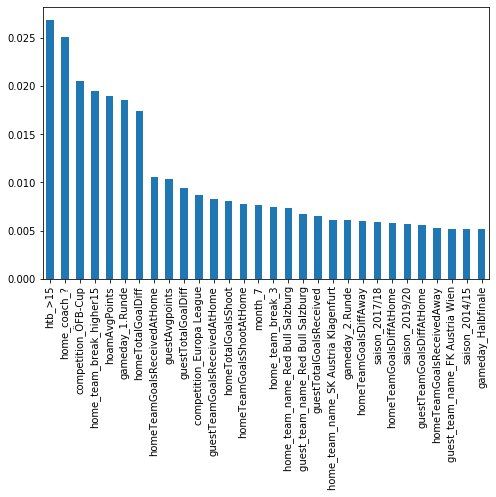

In [331]:
feat_imp = pd.Series(xgboost.feature_importances_, index=X_train.columns)
plt.figure(figsize=(8,5))
feat_imp.nlargest(30).plot(kind='bar')

In [297]:
def val(model):
    model.fit(X_train, y_train)
    model_name = 'test'
    model_name = pd.DataFrame()
    model_name['pred_test'] = model.predict(X_test)
    model_name['actual_test'] = y_test.values
    model_name['calc_test'] = model_name['pred_test'] * model_name['actual_test']
    score_test = model_name['calc_test'][model_name['calc_test'] > 0].count() / (len(model_name['calc_test']) - model_name['calc_test'][model_name['calc_test'] == 0].count())
    neg_score_test = model_name['calc_test'][model_name['calc_test'] < 0].count() / (len(model_name['calc_test']) - model_name['calc_test'][model_name['calc_test'] == 0].count())
    
    print(round(score_test,4), round(neg_score_test,4), (score_test+neg_score_test))
    print(model_name.head())
    
    model_name = 'train'
    model_name = pd.DataFrame()
    model_name['pred_train'] = model.predict(X_train)
    model_name['actual_train'] = y_train.values
    model_name['calc_train'] = model_name['pred_train'] * model_name['actual_train']
    score_train = model_name['calc_train'][model_name['calc_train'] > 0].count() / (len(model_name['calc_train']) - model_name['calc_train'][model_name['calc_train'] == 0].count())
    neg_score_train = model_name['calc_train'][model_name['calc_train'] < 0].count() / (len(model_name['calc_train']) - model_name['calc_train'][model_name['calc_train'] == 0].count())

    print('\n', round(score_train,4), round(neg_score_train,4), (score_train+neg_score_train))
    print(model_name.head())   

In [175]:
val(rfr)

0.6824 0.3176 1.0
   pred_test  actual_test  calc_test
0   0.364810          0.0   0.000000
1  -0.582537          0.0  -0.000000
2  -0.473419         -1.0   0.473419
3  -2.213989         -3.0   6.641966
4  -0.315344          0.0  -0.000000

 0.6757 0.3243 1.0
   pred_train  actual_train  calc_train
0    0.269778           2.0    0.539557
1   -0.599961          -4.0    2.399844
2   -0.491861          -4.0    1.967445
3    0.577365          -2.0   -1.154730
4    0.225162           3.0    0.675486


In [247]:
val(xgboost)

0.6731 0.3269 1.0
   pred_test  actual_test  calc_test
0   0.894339          1.0   0.894339
1  -0.071337          0.0  -0.000000
2   0.271314         -3.0  -0.813941
3   0.099478         -3.0  -0.298435
4   0.691256          0.0   0.000000

 0.695 0.305 1.0
   pred_train  actual_train  calc_train
0   -0.174078          -2.0    0.348155
1   -0.346250           2.0   -0.692499
2    0.352688          -1.0   -0.352688
3    0.505679           1.0    0.505679
4   -0.421043           0.0   -0.000000


In [248]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfr, random_state=123).fit(X_test, y_test)

In [249]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=None )

Weight,Feature
0.0441 ± 0.0123,hoamAvgPoints
0.0325 ± 0.0480,homeTeamGoalsReceivedAtHome
0.0262 ± 0.0056,competition_ÖFB-Cup
0.0219 ± 0.0250,homeTeamGoalsReceivedAway
0.0206 ± 0.0159,homeTeamGoalsShootAway
0.0170 ± 0.0406,guestTeamGoalsReceivedAtHome
0.0162 ± 0.0101,homeTotalGoalDiff
0.0159 ± 0.0150,guestTotalGoalDiff
0.0122 ± 0.0206,guestTotalGoalsShoot
0.0111 ± 0.0088,weekday_4


In [250]:
from sklearn.linear_model import SGDRegressor

In [251]:
sgdr = SGDRegressor()

In [252]:
sgdr.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [253]:
sgdr.score(X_train, y_train)

0.3195468472296463

In [254]:
sgdr.score(X_test, y_test)

0.13673577434689788

In [255]:
val(sgdr)

0.6646 0.3354 1.0
   pred_test  actual_test  calc_test
0   0.895990          1.0   0.895990
1   0.283339          0.0   0.000000
2   0.308216         -3.0  -0.924648
3   0.559772         -3.0  -1.679317
4   0.684609          0.0   0.000000

 0.706 0.294 1.0
   pred_train  actual_train  calc_train
0   -0.490536          -2.0    0.981073
1    0.079686           2.0    0.159373
2    0.238404          -1.0   -0.238404
3    1.042896           1.0    1.042896
4   -0.841056           0.0   -0.000000


In [33]:
svr = SVR()
svr.fit(X_train_scaled, y_train_scaled)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
svr.score(X_test_scaled, y_test_scaled)

0.13698181000147214

In [36]:
val(svr)

0.581 0.419 1.0
   pred_test  actual_test  calc_test
0   0.588523         -3.0  -1.765569
1   0.068594         -2.0  -0.137187
2   0.202703          0.0   0.000000
3   1.307293          4.0   5.229172
4  -0.197102          0.0  -0.000000


KeyboardInterrupt: 

In [37]:
xgboost.predict(X_test)

NameError: name 'xgboost' is not defined

In [ ]:
pred_frame = pd.DataFrame()
pred_frame['rf'] = rfr.predict(df_pred)
pred_frame['lasso'] = lasso.predict(df_pred)
pred_frame['ridge'] = ridge.predict(df_pred)
pred_frame['elastic'] = ENet.predict(df_pred)
pred_frame['gbr'] = gbr.predict(df_pred)
pred_frame['xgb'] = xgboost.predict(df_pred)
pred_frame['sgdr'] = sgdr.predict(df_pred)